In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("clean_twitter3.csv")

In [3]:
df.head()

,Unnamed: 0,text,target
0,0,can t believe i have to wait another months fo...,0
1,1,when did i felt so lonely,0
2,2,ugh a huge headache coughing constantly legs f...,0
3,3,got to go clean now knowing it will be messed ...,0
4,4,is still hoping google take over the world alg...,0


In [4]:
df.tail()

,Unnamed: 0,text,target
399995,399995,im doin the same so well definately gettup thi...,1
399996,399996,finding life s simple delights in the midst of...,1
399997,399997,just tell me when your on your way i ll keep c...,1
399998,399998,goodbye downtown,1
399999,399999,everyone should watch mtv hits rn its everyone...,1


In [5]:
import nltk
from nltk.tokenize import word_tokenize
reviews = df.text.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

116509


['i',
 'to',
 'the',
 'a',
 'my',
 'it',
 'and',
 'you',
 'is',
 'for',
 'in',
 's',
 't',
 'of',
 'on',
 'that',
 'me',
 'so',
 'have',
 'm',
 'but',
 'just',
 'with',
 'at',
 'be',
 'not',
 'was',
 'can',
 'now',
 'up',
 'this',
 'good',
 'all',
 'day',
 'out',
 'get',
 'like',
 'no',
 'are',
 'go',
 'got',
 'today',
 'do',
 'going',
 'too',
 'love',
 'your',
 'we',
 'work',
 'lol']

In [6]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

In [7]:
tokens[0:50]

['believe',
 'wait',
 'another',
 'months',
 'phone',
 'contract',
 'end',
 'bored',
 'month',
 'contract',
 'would',
 'run',
 'felt',
 'lonely',
 'ugh',
 'huge',
 'headache',
 'coughing',
 'constantly',
 'legs',
 'feeling',
 'week',
 'feeling',
 'like',
 'throwing',
 'sucks',
 'beyond',
 'compare',
 'got',
 'go',
 'clean',
 'knowing',
 'messed',
 'tomorrow',
 'still',
 'hoping',
 'google',
 'take',
 'world',
 'algebra',
 'revision',
 'new',
 'w',
 'core',
 'extreme',
 'x',
 'sse',
 'bit',
 'buildchain',
 'finally']

In [8]:
ddf=df.head()

In [9]:
ddf["target"]

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:

train_data, test_data, train_labels, test_labels = train_test_split(df["text"].values.astype('U'), 
                                                                    df["target"], 
                                                                    test_size = 0.2,
                                                                    random_state = 1)

In [12]:
test_labels[1:20]

136326    0
139035    0
184089    0
49577     0
276353    1
272437    1
334999    1
385043    1
250122    1
150861    0
192076    0
204364    1
208796    1
209593    1
357866    1
303040    1
357800    1
383390    1
363457    1
Name: target, dtype: int64

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


In [14]:
from sklearn.naive_bayes import MultinomialNB
from  sklearn.metrics  import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



In [15]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)
print(train_vectors.shape, test_vectors.shape)

(320000, 102091) (80000, 102091)


In [16]:
def clfr(clf, train_v, train_l, test_v, test_l, name ):
    clf.fit(train_v, train_l)
    predicted = clf.predict(test_v)
    print(name)

    conf_mat=confusion_matrix(test_l,predicted)
    #print(conf_mat)
    rep=classification_report(test_l,predicted)
    print(rep) 
    acc=accuracy_score(test_l,predicted)
    print("accuracy:",acc)
    return acc , conf_mat, rep

In [17]:
def heatmap(confusion_matrix_result, t, acc):
    classes = ["Negatives", "Positives"]

    plt.figure()
    plt.imshow(confusion_matrix_result, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(t+" confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    text_format = 'd'
    thresh = confusion_matrix_result.max() / 2.
    for row, column in itertools.product(range(confusion_matrix_result.shape[0]), range(confusion_matrix_result.shape[1])):
        plt.text(column, row, format(confusion_matrix_result[row, column], text_format),
                 horizontalalignment="center",
                 color="white" if confusion_matrix_result[row, column] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    print(t,"accuracy:", acc)

In [18]:
clf0 = MultinomialNB().fit(train_vectors, train_labels)

MultinomialNB:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78     40091
           1       0.79      0.75      0.77     39909

   micro avg       0.78      0.78      0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000

accuracy: 0.7765875


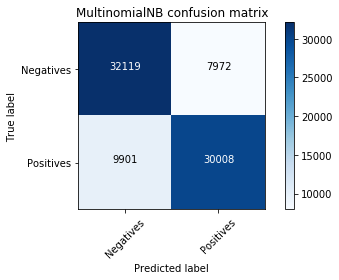

MultinomialNB accuracy: 0.7765875


In [19]:
ac0, c_m0, rep0=clfr(clf0,train_vectors,train_labels, test_vectors, test_labels,"MultinomialNB:" )
heatmap(c_m0, "MultinomialNB",ac0)

Decision tree:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71     40091
           1       0.71      0.70      0.71     39909

   micro avg       0.71      0.71      0.71     80000
   macro avg       0.71      0.71      0.71     80000
weighted avg       0.71      0.71      0.71     80000

accuracy: 0.7076625


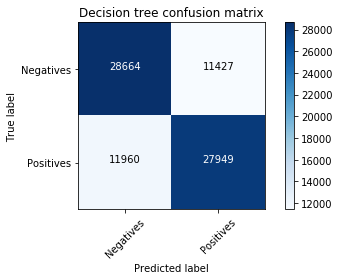

Decision tree accuracy: 0.7076625


In [20]:
clf1 = DecisionTreeClassifier(random_state=0)
ac1, c_m1, rep1=clfr(clf1,train_vectors,train_labels, test_vectors, test_labels, "Decision tree:" )
heatmap(c_m1, "Decision tree",ac1)

C:\Users\sattar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     40091
           1       0.79      0.81      0.80     39909

   micro avg       0.80      0.80      0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000

accuracy: 0.7968


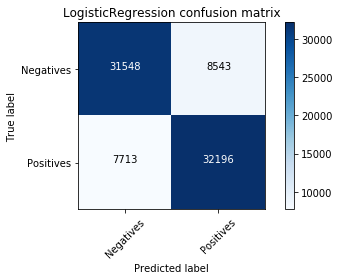

LogisticRegression accuracy: 0.7968


In [21]:
clf3 = LogisticRegression()
ac3, c_m3, rep3=clfr(clf3,train_vectors,train_labels, test_vectors, test_labels, "LogisticRegression:" )
heatmap(c_m3, "LogisticRegression",ac3)

KNN:
              precision    recall  f1-score   support

           0       0.56      0.92      0.70     40091
           1       0.78      0.28      0.41     39909

   micro avg       0.60      0.60      0.60     80000
   macro avg       0.67      0.60      0.56     80000
weighted avg       0.67      0.60      0.56     80000

accuracy: 0.6017625


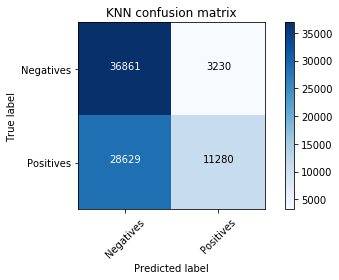

KNN accuracy: 0.6017625


In [22]:
clf4 = KNeighborsClassifier(n_neighbors=3)
ac4, c_m4, rep4=clfr(clf4,train_vectors,train_labels, test_vectors, test_labels, "KNN:" )
heatmap(c_m4, "KNN",ac4)

clf5 = RandomForestClassifier(n_estimators=50, random_state=0)
ac5, c_m5, rep5=clfr(clf5,train_vectors,train_labels, test_vectors, test_labels, "Random Forest" )
heatmap(c_m5, "Random Forest",ac5)

Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77     40091
           1       0.77      0.74      0.76     39909

   micro avg       0.76      0.76      0.76     80000
   macro avg       0.76      0.76      0.76     80000
weighted avg       0.76      0.76      0.76     80000

accuracy: 0.7602625


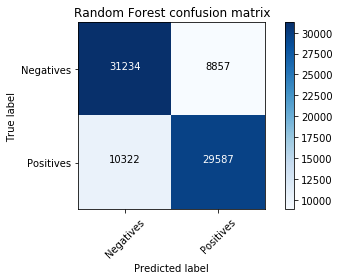

Random Forest accuracy: 0.7602625


In [23]:

clf5 = RandomForestClassifier(n_estimators=15, random_state=0) 
ac5, c_m5, rep5=clfr(clf5,train_vectors,train_labels, test_vectors, test_labels, "Random Forest:" ) 
heatmap(c_m5, "Random Forest",ac5)

clf2 = SVC(gamma='auto')
ac2, c_m2, rep2=clfr(clf2,train_vectors,train_labels, test_vectors, test_labels, "SVM" )
heatmap(c_m2, "SVM",ac2)